In [1]:
# Dependencies

import requests
from config import api_key
import pandas as pd
import datetime as dt
from datetime import datetime as ds
import json
from pprint import pprint
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Getting Inflation data for US by reading HTML

In [2]:
# Define the url to read the html

url = 'https://www.in2013dollars.com/us/inflation/1930?amount=1'

In [3]:
# Read the web page and print results

cpi_inflation = pd.read_html(url)
cpi_inflation

[                            0               1
 0     Cumulative price change       1,534.75%
 1      Average inflation rate           3.12%
 2  Converted amount ($1 base)          $16.35
 3  Price difference ($1 base)          $15.35
 4                 CPI in 1930          16.700
 5                 CPI in 2021         273.003
 6           Inflation in 1930          -2.34%
 7           Inflation in 2021           5.37%
 8                  $1 in 1930  $16.35 in 2021,
     Year Dollar Value Inflation Rate
 0   1930        $1.00         -2.34%
 1   1931        $0.91         -8.98%
 2   1932        $0.82         -9.87%
 3   1933        $0.78         -5.11%
 4   1934        $0.80          3.08%
 ..   ...          ...            ...
 87  2017       $14.68          2.13%
 88  2018       $15.04          2.49%
 89  2019       $15.31          1.76%
 90  2020       $15.50          1.23%
 91  2021       $16.35         5.48%*
 
 [92 rows x 3 columns],
                  Initial value              Eq

In [4]:
# Select the required table for CPI and Inflation from the page and build the required dataframe

cpi_inflation_df = cpi_inflation[1]
cpi_inflation_df 

,Year,Dollar Value,Inflation Rate
0,1930,$1.00,-2.34%
1,1931,$0.91,-8.98%
2,1932,$0.82,-9.87%
3,1933,$0.78,-5.11%
4,1934,$0.80,3.08%
...,...,...,...
87,2017,$14.68,2.13%
88,2018,$15.04,2.49%
89,2019,$15.31,1.76%
90,2020,$15.50,1.23%


In [5]:
cpi_inflation_df = cpi_inflation_df.replace('\$','',regex=True)
cpi_inflation_df = cpi_inflation_df.replace('\%','',regex=True)
cpi_inflation_df = cpi_inflation_df.replace('\*','',regex=True)
cpi_inflation_df = cpi_inflation_df.astype(float)
cpi_inflation_df

,Year,Dollar Value,Inflation Rate
0,1930.0,1.00,-2.34
1,1931.0,0.91,-8.98
2,1932.0,0.82,-9.87
3,1933.0,0.78,-5.11
4,1934.0,0.80,3.08
...,...,...,...
87,2017.0,14.68,2.13
88,2018.0,15.04,2.49
89,2019.0,15.31,1.76
90,2020.0,15.50,1.23


In [6]:
# Rename Columns

cpi_inflation_df.columns = ['date', 'dollar_value', 'inflation_rate']
cpi_inflation_df

,date,dollar_value,inflation_rate
0,1930.0,1.00,-2.34
1,1931.0,0.91,-8.98
2,1932.0,0.82,-9.87
3,1933.0,0.78,-5.11
4,1934.0,0.80,3.08
...,...,...,...
87,2017.0,14.68,2.13
88,2018.0,15.04,2.49
89,2019.0,15.31,1.76
90,2020.0,15.50,1.23


### Getting GDP data from St. Louis Fed. using an API call

In [7]:
#https://alfred.stlouisfed.org/series/downloaddata?seid=MABMM301USA657S

url = 'https://api.stlouisfed.org/fred/series/observations?series_id=A191RL1A225NBEA'
realtime_start = '1958-01-01'
realtime_end = '2021-01-31'

In [8]:
# Build query URL

query_url = url + "&realtime_start=" + realtime_start + "&realtime_end=" + realtime_end + "&api_key=" + api_key + "&file_type=json"

In [9]:
# Print the results of the query in a json format

response = requests.get(query_url).json()
pprint(response)

{'count': 129,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1930-01-01',
                   'realtime_end': '2021-01-31',
                   'realtime_start': '2014-10-31',
                   'value': '-8.5'},
                  {'date': '1931-01-01',
                   'realtime_end': '2021-01-31',
                   'realtime_start': '2014-10-31',
                   'value': '-6.4'},
                  {'date': '1932-01-01',
                   'realtime_end': '2021-01-31',
                   'realtime_start': '2014-10-31',
                   'value': '-12.9'},
                  {'date': '1933-01-01',
                   'realtime_end': '2018-07-26',
                   'realtime_start': '2014-10-31',
                   'value': '-1.3'},
                  {'date': '1933-01-01',
                   'realtime_end': '2021-01-31',
                   'realtime_start': '2018-07-27',
                   'v

In [10]:
# Select the observations from the response

pprint(response['observations'])

[{'date': '1930-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2014-10-31',
  'value': '-8.5'},
 {'date': '1931-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2014-10-31',
  'value': '-6.4'},
 {'date': '1932-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2014-10-31',
  'value': '-12.9'},
 {'date': '1933-01-01',
  'realtime_end': '2018-07-26',
  'realtime_start': '2014-10-31',
  'value': '-1.3'},
 {'date': '1933-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2018-07-27',
  'value': '-1.2'},
 {'date': '1934-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2014-10-31',
  'value': '10.8'},
 {'date': '1935-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2014-10-31',
  'value': '8.9'},
 {'date': '1936-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2014-10-31',
  'value': '12.9'},
 {'date': '1937-01-01',
  'realtime_end': '2021-01-31',
  'realtime_start': '2014-10-31',
  'value': '5.1'},
 {'date': '

In [11]:
# Dump the results into pandas dataframe

gdp_df = pd.DataFrame(response['observations'])
gdp_df

,realtime_start,realtime_end,date,value
0,2014-10-31,2021-01-31,1930-01-01,-8.5
1,2014-10-31,2021-01-31,1931-01-01,-6.4
2,2014-10-31,2021-01-31,1932-01-01,-12.9
3,2014-10-31,2018-07-26,1933-01-01,-1.3
4,2018-07-27,2021-01-31,1933-01-01,-1.2
...,...,...,...,...
124,2019-02-28,2020-07-29,2018-01-01,2.9
125,2020-07-30,2021-01-31,2018-01-01,3.0
126,2020-01-30,2020-07-29,2019-01-01,2.3
127,2020-07-30,2021-01-31,2019-01-01,2.2


In [12]:
# Select the required columns 'date' and 'value' for the analysis

gdp_df = gdp_df[['date', 'value']]
gdp_df

,date,value
0,1930-01-01,-8.5
1,1931-01-01,-6.4
2,1932-01-01,-12.9
3,1933-01-01,-1.3
4,1933-01-01,-1.2
...,...,...
124,2018-01-01,2.9
125,2018-01-01,3.0
126,2019-01-01,2.3
127,2019-01-01,2.2


In [13]:
# Rename Columns

gdp_df.columns = ['date', 'gdp_rate']
gdp_df

,date,gdp_rate
0,1930-01-01,-8.5
1,1931-01-01,-6.4
2,1932-01-01,-12.9
3,1933-01-01,-1.3
4,1933-01-01,-1.2
...,...,...
124,2018-01-01,2.9
125,2018-01-01,3.0
126,2019-01-01,2.3
127,2019-01-01,2.2


In [14]:
# Change the dtype of the Year column from 'object' to 'datetime' to be able to select the year portion of date

gdp_df['date'] = [ds.strptime(x,'%Y-%m-%d') for x in gdp_df['date']]

<ipython-input-14-39d9e4b90d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df['date'] = [ds.strptime(x,'%Y-%m-%d') for x in gdp_df['date']]


In [15]:
# Select just the years from the dates

gdp_df['date'] = gdp_df['date'].dt.year
gdp_df

<ipython-input-15-c729f58d5b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df['date'] = gdp_df['date'].dt.year


,date,gdp_rate
0,1930,-8.5
1,1931,-6.4
2,1932,-12.9
3,1933,-1.3
4,1933,-1.2
...,...,...
124,2018,2.9
125,2018,3.0
126,2019,2.3
127,2019,2.2


In [32]:
# Drop the duplicated year values

gdp_df = gdp_df.drop_duplicates(keep='last', subset=['date']).astype(float)
gdp_df

,date,gdp_rate
0,1930.0,-8.5
1,1931.0,-6.4
2,1932.0,-12.9
4,1933.0,-1.2
5,1934.0,10.8
...,...,...
119,2016.0,1.7
123,2017.0,2.3
125,2018.0,3.0
127,2019.0,2.2


### Reading xls to obtain Money Stock (M3) in the US

In [17]:
# Read United States values M3 values from 1958 into a dataframe

m3_data = pd.read_excel('us_m3.xls')
m3_data

,observation_date,MABMM301USA657S_20210414
0,1958-01-01,NaN
1,1959-01-01,NaN
2,1960-01-01,3.744744
3,1961-01-01,6.753574
4,1962-01-01,7.778348
...,...,...
58,2016-01-01,6.787281
59,2017-01-01,5.700626
60,2018-01-01,3.848735
61,2019-01-01,5.096518


In [18]:
# Rename the columns

m3_data.columns = ['date', 'm3_rate']
m3_data

,date,m3_rate
0,1958-01-01,NaN
1,1959-01-01,NaN
2,1960-01-01,3.744744
3,1961-01-01,6.753574
4,1962-01-01,7.778348
...,...,...
58,2016-01-01,6.787281
59,2017-01-01,5.700626
60,2018-01-01,3.848735
61,2019-01-01,5.096518


In [19]:
#Change date format to year to match the CPI_Inflation table

m3_data['date'] = m3_data['date'].dt.year
m3_data = m3_data.round(decimals=2)
m3_data


,date,m3_rate
0,1958,NaN
1,1959,NaN
2,1960,3.74
3,1961,6.75
4,1962,7.78
...,...,...
58,2016,6.79
59,2017,5.70
60,2018,3.85
61,2019,5.10


### Merge Tables

In [35]:
new_df = pd.merge(cpi_inflation_df, gdp_df, on='date', how='outer')
new_df

,date,dollar_value,inflation_rate,gdp_rate
0,1930.0,1.00,-2.34,-8.5
1,1931.0,0.91,-8.98,-6.4
2,1932.0,0.82,-9.87,-12.9
3,1933.0,0.78,-5.11,-1.2
4,1934.0,0.80,3.08,10.8
...,...,...,...,...
87,2017.0,14.68,2.13,2.3
88,2018.0,15.04,2.49,3.0
89,2019.0,15.31,1.76,2.2
90,2020.0,15.50,1.23,-3.5


In [36]:
combined_df = pd.merge(new_df, m3_data, on='date', how='outer')
combined_df

,date,dollar_value,inflation_rate,gdp_rate,m3_rate
0,1930.0,1.00,-2.34,-8.5,NaN
1,1931.0,0.91,-8.98,-6.4,NaN
2,1932.0,0.82,-9.87,-12.9,NaN
3,1933.0,0.78,-5.11,-1.2,NaN
4,1934.0,0.80,3.08,10.8,NaN
...,...,...,...,...,...
87,2017.0,14.68,2.13,2.3,5.70
88,2018.0,15.04,2.49,3.0,3.85
89,2019.0,15.31,1.76,2.2,5.10
90,2020.0,15.50,1.23,-3.5,19.16


In [37]:
## Drop Nulls
clean_df = combined_df.dropna(how='any')
clean_df

,date,dollar_value,inflation_rate,gdp_rate,m3_rate
30,1960.0,1.77,1.72,2.6,3.74
31,1961.0,1.79,1.01,2.6,6.75
32,1962.0,1.81,1.00,6.1,7.78
33,1963.0,1.83,1.32,4.4,8.43
34,1964.0,1.86,1.31,5.8,7.83
...,...,...,...,...,...
86,2016.0,14.37,1.26,1.7,6.79
87,2017.0,14.68,2.13,2.3,5.70
88,2018.0,15.04,2.49,3.0,3.85
89,2019.0,15.31,1.76,2.2,5.10


No handles with labels found to put in legend.


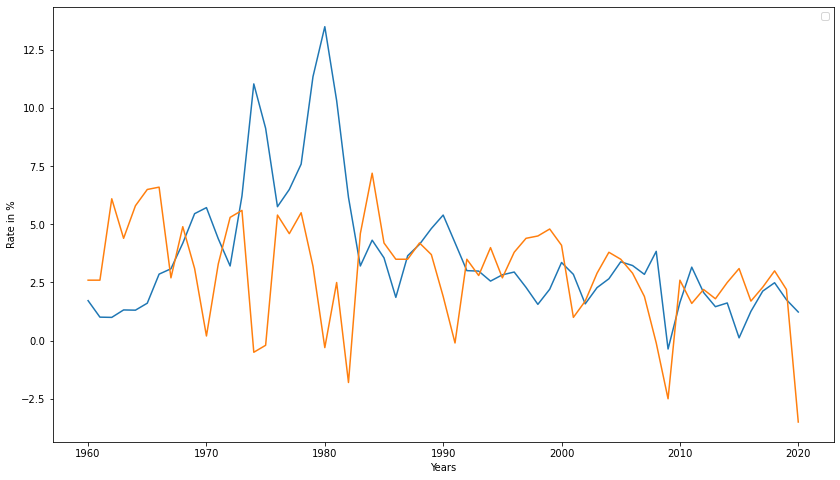

In [55]:
plt.figure(figsize=(14,8))
#plt.plot(clean_df['date'], clean_df['dollar_value'])
plt.plot(clean_df['date'], clean_df['inflation_rate'])
plt.plot(clean_df['date'], clean_df['gdp_rate'])
#plt.plot(clean_df['date'], clean_df['m3_rate'])
plt.ylabel('Rate in %')
plt.xlabel('Years')
plt.legend()
plt.show()

### Create database connection and load the individual tables into database

In [24]:
connection_string = "postgres:Bias1981@localhost:5432/economic_indicators"
engine = create_engine(f'postgresql://{connection_string}')

In [25]:
cpi_inflation_df.to_sql(name='cpi_inflation', con=engine, if_exists='replace', index=False)

In [26]:
gdp_df.to_sql(name='gdp', con=engine, if_exists='replace', index=False)

In [27]:
m3_data.to_sql(name='m3', con=engine, if_exists='replace', index=False)

In [28]:
# Confirm tables exist in database
engine.table_names()

['cpi_inflation', 'gdp', 'm3']

### Query the tables

In [29]:
pd.read_sql_query('select * from cpi_inflation', con=engine).head()

,date,dollar_value,inflation_rate
0,1930.0,1.00,-2.34
1,1931.0,0.91,-8.98
2,1932.0,0.82,-9.87
3,1933.0,0.78,-5.11
4,1934.0,0.80,3.08


In [30]:
pd.read_sql_query('select * from gdp', con=engine).head()

,date,gdp_rate
0,1930,-8.5
1,1931,-6.4
2,1932,-12.9
3,1933,-1.2
4,1934,10.8


In [31]:
pd.read_sql_query('select * from m3', con=engine).head()

,date,m3_rate
0,1958,NaN
1,1959,NaN
2,1960,3.74
3,1961,6.75
4,1962,7.78
